In [35]:
!pip install control 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Modelizado

Modelizar un sistema es generar una representación matemática de este, entendiendolo como una relación entre una serie de entradas y una serie de salidas.

Para modelizar un sistema vamos a utilizar diferentes formas entre ellas estan:

- Ecuación diferencial.
- Diagrama de bloques.
- Función de transferencia. 

De estas una de la formas más utiles en control es la función de transferencia. Para encontrar esta podemos hacerlo de manera teórica utilizando la transformada de Laplace o Podemos hacerlo de una manera más interactiva partiendo de la _ecuación diferencial_ en donde despejaremos la derivada más grande de cada ecuación y luego construimos un diagrama de bloques. 

Una vez tenemos el diagrama de bloque tomamos los bloques que tiene integrales y los pasamos al dominio de Laplace

$$\int dt \to \frac{1}{s}$$

## Sistema masa resorte amortiguador

Para comenzar utilicemos un modelo de masa-resorte (masa $m$ y resorte $k$) con una fuerza external de entrada $F$. El modelo de este sistema se puede encontrar utilizando el principio fundemental de la dinámica que dicta que la sumatoria de fuerza es igual a la masa por la aceleración.

$$F-k\, x=m\, a$$

Recordemos que la aceleración $a$ es la segunda derivada de la posición $x$, de ahí.

$$F-k\, x=m\, \frac{d^2x}{dt^2}$$

Una vez tenemos el modelo del sistema como una función de transferencia, podemos escribir el modelo como un diagrama de bloques. Para lograrlo, debemos despejar la derivada más grande. 

$$\frac{d^2x}{dt^2} = \frac{1}{m} (F-k\, x)$$

Esta equación puede ser descrita por un diagrama de bloques. 

$$F \to + \to \boxed{\frac{1}{m}}\to\boxed{\frac{1}{s}}\to\boxed{\frac{1}{s}}\to x$$

La posición realimenta al nodo de suma a traves de $k$

$$x \to \boxed{k} \to - $$

### Función de transferencia

La función de transferencia puede ser encontrada utilizando el paquete de control de **Python**.

In [27]:
from matplotlib.pyplot import plot
from control import *
%matplotlib inline

Primero definimos los bloques del sistema

In [28]:
m = 4
k = 5

In [29]:
invM = tf(1,m)
integral = tf(1,[1,0])
spring = tf(k,1)

Con estos bloques podemos reconstruir el diagrama de bloques y construir la función de transferencia entre la salida y la entrada.

Empecemos construyendo la función de transferencia del primer lazo, esto se puede hacer por dos metodos:

In [30]:
G = invM * integral * integral
G2 = series(invM, integral, integral)

Que producen el mismo resultado

In [31]:
G
G2


  1
-----
4 s^2

Ahora podemos incluir el lazo cerrado en el sistema. 

In [32]:
XF = feedback(G,spring)

In [33]:
XF


    1
---------
4 s^2 + 5

In [34]:
T2,yout2 = step_response(G)

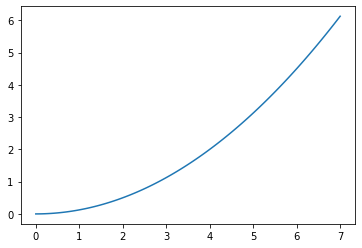

In [35]:
plot(T2,yout2)

## Ejercicios

Encontrar la función de transferencia de :

- Un sistema masa-resorte-amortiguador
- Un sistema de tanque con caudal de entrada (como entrada), caudal de salida con caida atmosferica, y la altura $h$ como salida.

## Masa resorte amortiguador

from control import *

In [36]:
from matplotlib.pyplot import plot
from control import *
%matplotlib inline

Definicion de variables

In [37]:
m = 4
k = 5
C = 3

In [38]:
invM = tf(1,m)
integral = tf(1,[1,0])
spring = tf(k,1)
spring2 = tf(C,1)

Con estos bloques podemos reconstruir el diagrama de bloques y construir la función de transferencia entre la salida y la entrada.

In [39]:
G3 = series(invM, integral)
G4 = feedback(G3, spring2)
G5 = series(G4, integral)
G6 = feedback(G5, spring)

Imprimo la funcion de transferencia final

In [40]:
G6



       1
---------------
4 s^2 + 3 s + 5

In [41]:
T,yout = step_response(G6)

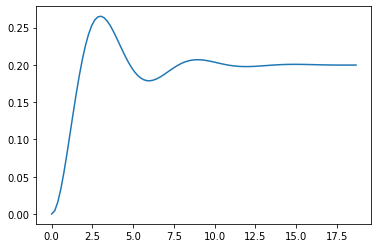

In [42]:
plot(T,yout)

## Tanque con caudal de entrada (como entrada), caudal de salida con caida atmosferica, y la altura

In [43]:
from matplotlib.pyplot import plot
from control import *
%matplotlib inline

Definicion de variables

In [44]:
A = 4
R = 5

Elaboro las formulas

In [45]:
invM = tf(1,A)
integral = tf(1,[1,0])
spring = tf(1,R)

Elaboro el sistema de control del tanque

In [46]:
G7 = series(invM, integral)
G8 = feedback(G7, spring)

Imprimo la funcion de control final

In [47]:
G8


    5
--------
20 s + 1

In [48]:
T3,yout3 = step_response(G8)

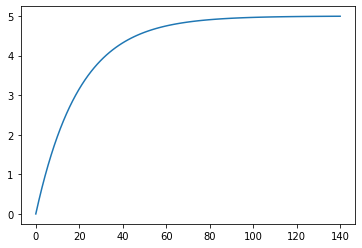

In [49]:
plot(T3,yout3)

## SISTEMA DE PRIMER ORDEN

In [50]:
from matplotlib.pyplot import plot
from control import *
%matplotlib inline

gama es ganancia tau es la constante de tiempo en segundos

In [73]:
gama = 100
tau = 10

In [74]:
PO = tf([gama],[tau,1])
PO


  100
--------
10 s + 1

In [75]:
T4,yout4 = step_response(PO)
T9,yout9 = impulse_response(PO)

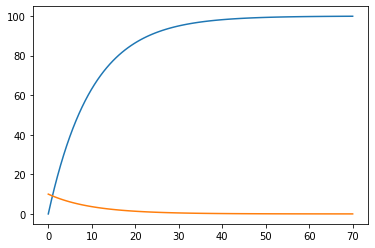

In [76]:
plot(T4,yout4)
plot(T9,yout9)

tou = 63%, 3tou = 95% y 5tou = 99%

## SISTEMA DE SEGUNDO ORDEN

In [55]:
from matplotlib.pyplot import plot
from control import *
%matplotlib inline

xi es cuanta energia esta perdiendo (amortiguamiento), Omegan varia la frecuencia del sistema

In [66]:
gama2 = 100
omegan = 1
xi = 0.1

SO = tf([gama2],[1/omegan**2,2*xi/omegan,1])
SO


      100
---------------
s^2 + 0.2 s + 1

In [67]:
gama3 = 100
omegan2 = 1
xi2 = 0.7

SO2 = tf([gama3],[1/omegan2**2,2*xi2/omegan2,1])

SO2


      100
---------------
s^2 + 1.4 s + 1

In [68]:
gama4 = 100
omegan3 = 1
xi3 = 0

SO3 = tf([gama4],[1/omegan3**2,2*xi3/omegan3,1])

SO3


  100
-------
s^2 + 1

In [69]:
gama5 = 1
omegan4 = 1
xi4 = 0.7

SO4 = tf([gama5],[1/omegan4**2,2*xi4/omegan4,1])

SO4


       1
---------------
s^2 + 1.4 s + 1

In [70]:
gama6 = 100
omegan5 = 1
xi5 = 1

SO5 = tf([gama6],[1/omegan5**2,2*xi5/omegan5,1])

SO5


     100
-------------
s^2 + 2 s + 1

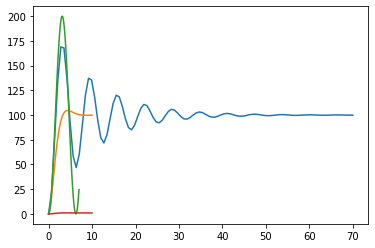

In [72]:
T5,yout5 = step_response(SO)
T6,yout6 = step_response(SO2)
T7,yout7 = step_response(SO3)
T8,yout8 = step_response(SO4)
plot(T5,yout5)
plot(T6,yout6)
plot(T7,yout7)
plot(T8,yout8)

In [86]:
SO


      100
---------------
s^2 + 0.2 s + 1

In [87]:
tau= 1/(xi*omegan)
PO2 = tf([gama2],[tau,1])
PO2


  100
--------
10 s + 1

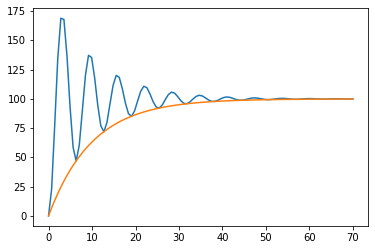

In [88]:
T10,yout10 = step_response(PO2)
plot(T5,yout5)
plot(T10,yout10)